In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import missingno as mo
import warnings
warnings.filterwarnings('ignore')
import tqdm
import dtale



In [50]:
df=pd.read_csv(r'C:\Users\Ajay\Desktop\Sidd\Python\Machine Learning\Machine learning 1\Datasets\loan_predict.csv')

In [51]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


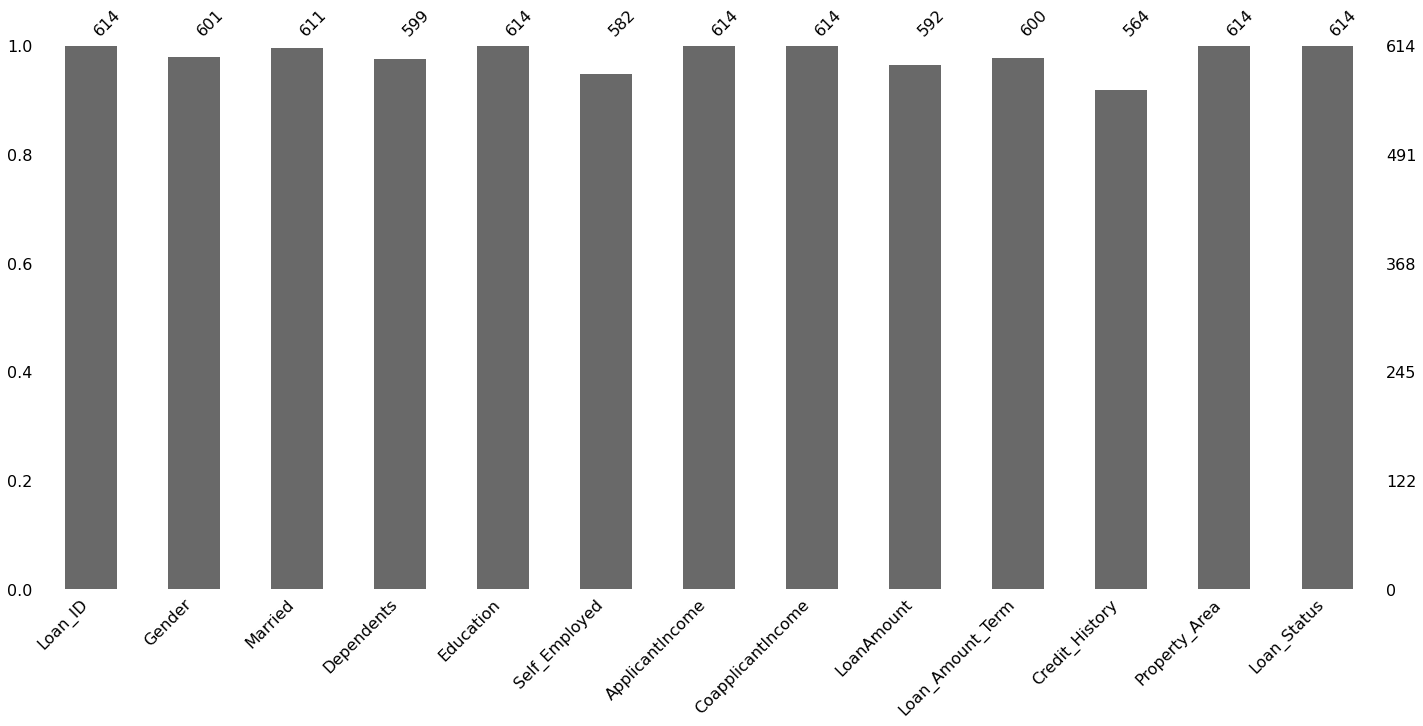

In [52]:
mo.bar(df)

In [53]:
%%time
def empty_columns(df):
    import time
    t=time.time()
    missing_count=df.isnull().sum()
    missing_percent=(df.isnull().sum()/len(df))*100
    new_frame=pd.DataFrame({'Missing_Count':missing_count,
                            'Missing_Columns_percent':missing_percent})
    s=t-time.time()
    return new_frame.sort_values(by='Missing_Columns_percent',ascending=False)
    

Wall time: 0 ns


In [54]:
empty_columns(df)

,Missing_Count,Missing_Columns_percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [56]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [57]:
#checking the imbalanceness of the dataset:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [58]:
#the dataset is fairly imbalance data set , but for our understanding we are simpy taking the dqtaset as it is
#lets us start by cleaning the dataset by flling the missing_columns
df[df['Loan_Status']=='Y']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y


In [59]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [60]:
df.drop(columns="Loan_ID", axis=1,inplace=True)

In [61]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [62]:
#df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
    
   

In [63]:
pd.__version__

'0.24.2'

In [64]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [65]:
df.columns          

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [66]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [67]:
#fill_columns(df)

In [68]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [69]:
#df['Gender']=df['Gender'].fillna('Male',inplace=True)

In [70]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [71]:
empty_columns(df)

,Missing_Count,Missing_Columns_percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


In [72]:
for i in df.columns:
   if df[i].dtypes=='object'  :
    print(i,df[i].mode())
   elif df[i].dtypes!='object':
    print(i,df[i].median())
   

Gender 0    Male
dtype: object
Married 0    Yes
dtype: object
Dependents 0    0
dtype: object
Education 0    Graduate
dtype: object
Self_Employed 0    No
dtype: object
ApplicantIncome 3812.5
CoapplicantIncome 1188.5
LoanAmount 128.0
Loan_Amount_Term 360.0
Credit_History 1.0
Property_Area 0    Semiurban
dtype: object
Loan_Status 0    Y
dtype: object


In [73]:
#print(df.Gender.isnull().values.any())   # prints True
def fill_missing(df):
    df.Gender = df.Gender.fillna('Male')                      # replace NaN values with 0
    df.Credit_History = df.Credit_History.fillna(1.0)    
    df.Self_Employed = df.Credit_History.fillna("No")   
    df.LoanAmount = df.Credit_History.fillna(128.0)

    df.Dependents = df.Dependents.fillna(0)
    df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360.0)
    df.Married = df.Married.fillna("Yes")
    return 'SuccessfullFilled'
#print(df.Gender.isnull().values.any())   # prints False now :)

In [74]:
fill_missing(df)

'SuccessfullFilled'

In [75]:
empty_columns(df)

,Missing_Count,Missing_Columns_percent
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0
Credit_History,0,0.0


In [76]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,1.0,5849,0.0,1.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,1.0,4583,1508.0,1.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,1.0,3000,0.0,1.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,1.0,2583,2358.0,1.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,1.0,6000,0.0,1.0,360.0,1.0,Urban,Y


In [77]:
df.columns 

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [78]:
#Need to deal Around With Kurtosis And Skew AlSo As a Preprocessing Step

In [79]:
#kurtosis should be -5 , 5
df.kurtosis()

Self_Employed         2.095179
ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount            2.095179
Loan_Amount_Term      6.924993
Credit_History        2.095179
dtype: float64

In [80]:
#skew should Be -1 and 1
df.skew()

Self_Employed       -2.021971
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount          -2.021971
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [81]:
new_df=df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History','Loan_Status']]

In [82]:
new_df

,Gender,Married,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,Male,No,5849,1.0,1.0,Y
1,Male,Yes,4583,1.0,1.0,N
2,Male,Yes,3000,1.0,1.0,Y
3,Male,Yes,2583,1.0,1.0,Y
4,Male,No,6000,1.0,1.0,Y
5,Male,Yes,5417,1.0,1.0,Y
6,Male,Yes,2333,1.0,1.0,Y
7,Male,Yes,3036,0.0,0.0,N
8,Male,Yes,4006,1.0,1.0,Y
9,Male,Yes,12841,1.0,1.0,N


In [83]:
new_df.shape

(614, 6)

In [84]:
new_df['Gender']=new_df['Gender'].map({'Male':0,'Female':1})

In [85]:
new_df['Married']=new_df['Married'].map({'No':0,'Yes':1})

In [91]:
new_df['Loan_Status']=new_df['Loan_Status'].map({'N':0,'Y':1})

In [86]:
#df_converted=pd.get_dummies(data=df, columns=columns_to_convert, drop_first=True,prefix_sep='_')

In [87]:
#handlng the Target Column

In [92]:
new_df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [93]:
new_df.head()

,Gender,Married,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0,0,5849,1.0,1.0,1
1,0,1,4583,1.0,1.0,0
2,0,1,3000,1.0,1.0,1
3,0,1,2583,1.0,1.0,1
4,0,0,6000,1.0,1.0,1


In [89]:
def mapping(x):
    if x=='Y':
     return 1
    elif x=='N':
     return 0

In [94]:
X=new_df.drop(labels='Loan_Status',axis=1)
y=new_df[['Loan_Status']]

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [97]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=6)

In [98]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(429, 5)
(185, 5)
(429, 1)
(185, 1)


In [99]:
new_df.dtypes

Gender               int64
Married              int64
ApplicantIncome      int64
LoanAmount         float64
Credit_History     float64
Loan_Status          int64
dtype: object

In [100]:
lr=LogisticRegression()

In [101]:
lr.fit(X_train,y_train)

LogisticRegression()

In [102]:
prediction_train=lr.predict(X_train)

In [103]:
prediction_test=lr.predict(X_test)

In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       1.00      0.04      0.07        57
           1       0.70      1.00      0.82       128

    accuracy                           0.70       185
   macro avg       0.85      0.52      0.45       185
weighted avg       0.79      0.70      0.59       185



In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
confusion_matrix(y_test, prediction_test)

array([[  2,  55],
       [  0, 128]], dtype=int64)

In [108]:
 from sklearn.metrics import accuracy_score

In [109]:
accuracy_score(y_test, prediction_test)

0.7027027027027027

In [110]:
pred_prob1 = lr.predict_proba(X_test)

In [111]:
pred_prob1

array([[0.4145029 , 0.5854971 ],
       [0.21615284, 0.78384716],
       [0.21012798, 0.78987202],
       [0.20795061, 0.79204939],
       [0.24469443, 0.75530557],
       [0.26660146, 0.73339854],
       [0.41765748, 0.58234252],
       [0.20264093, 0.79735907],
       [0.2160863 , 0.7839137 ],
       [0.2572938 , 0.7427062 ],
       [0.2222499 , 0.7777501 ],
       [0.24570355, 0.75429645],
       [0.25360578, 0.74639422],
       [0.21573038, 0.78426962],
       [0.21224863, 0.78775137],
       [0.21593371, 0.78406629],
       [0.24046774, 0.75953226],
       [0.24798429, 0.75201571],
       [0.20732448, 0.79267552],
       [0.20954189, 0.79045811],
       [0.24505446, 0.75494554],
       [0.20801531, 0.79198469],
       [0.21242637, 0.78757363],
       [0.23911163, 0.76088837],
       [0.25267977, 0.74732023],
       [0.2306795 , 0.7693205 ],
       [0.20579371, 0.79420629],
       [0.23688694, 0.76311306],
       [0.27273803, 0.72726197],
       [0.24831188, 0.75168812],
       [0.

In [112]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

In [113]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [114]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

0.7637746710526316


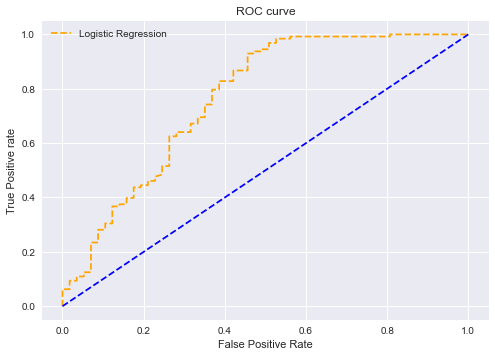

In [115]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [116]:
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(lr, pickle_out) 
pickle_out.close()

In [ ]:
#!pip install -q streamlit

In [ ]:
 #!pip install -q pyngrok


In [ ]:
#!pip install -q streamlit_ace